# Tacit Collusion and Dynamic Competition


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.optimize import minimize

# Model

In [2]:
def R(pi, pj): 
    if pi<pj: 
        return 1. 
    elif pi==pj: 
        return 0.5
    else: 
        return 0.0 

def s(p1, p2, alpha): 
    u0 = 0.0 
    u1 = 1.0 - p1 + alpha*R(p1,p2)
    u2 = 1.0 - p2 + alpha*R(p2,p1)

    u = np.array([u0, u1, u2]) 

    # max-rescale utilities: probabilities are left unchanged but we get rid of numerical 
    # *overflow* errors (posssibly at the cost of more underflow errors, which are less problematic)
    u -= np.max(u, keepdims=True) 

    eu = np.exp(u)
    denom = np.sum(eu)

    return eu[1]/denom, eu[2]/denom

def profit1(p1, p2, alpha=1.0): 
    s1, s2 = s(p1, p2, alpha)
    return s1*p1

def profit2(p1, p2, alpha=1.0): 
    s1, s2 = s(p1, p2, alpha)
    return s2*p2

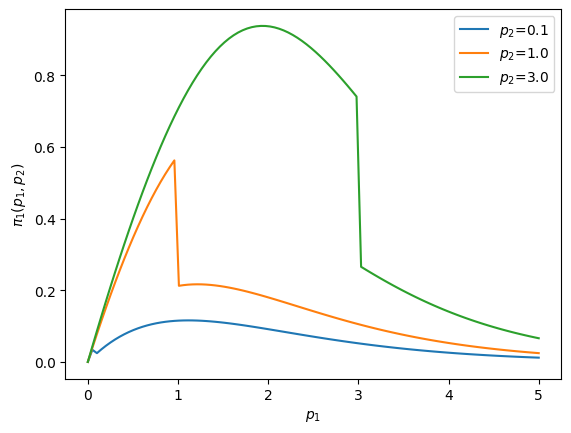

In [3]:
this_alpha = 1.0
pp1 = np.linspace(0., 5., 100)
for p2 in [0.1,1.,3.]: 
    pi1s = np.array([profit1(p1,p2,alpha=this_alpha) for p1 in pp1])
    plt.plot(pp1, pi1s, label=f'$p_2$={p2}')
plt.legend(); plt.ylabel('$\pi_1(p_1,p_2)$'); plt.xlabel('$p_1$'); 

## 2.1

In [11]:
def find_nash_equilibrium(alpha=0.0):
    p1_init = 0.5   
    p2_init = 0.5
    
    result1 = minimize(lambda p: -profit1(p[0], p2_init, alpha), [p1_init])
    p1_star = result1.x[0]
    
    result2 = minimize(lambda p: -profit2(p1_star, p[0], alpha), [p2_init])
    p2_star = result2.x[0]
    
    return p1_star, p2_star

alpha = 0.0
p1_star, p2_star = find_nash_equilibrium(alpha)

print(f"Nash equilibrium prices for alpha = {alpha}: p1* = {p1_star}, p2* = {p2_star}")

Nash equilibrium prices for alpha = 0.0: p1* = 1.2841796875000016, p2* = 1.387304687500002


## 2.2

In [5]:
def combined_profit(p):
    p = p[0]
    
    exp_term = np.exp(1 - p)
    D = exp_term / (1 + 2 * exp_term)
    
    return -2 * D * p  # We minimize the negative profit to maximize the profit

p_init = 0.5

result = minimize(combined_profit, [p_init], bounds=[(0, None)])

optimal_p = result.x[0]

print(f"Optimal symmetric price for the cartel: p* = {optimal_p}")


Optimal symmetric price for the cartel: p* = 1.852605669830903
